# **Getting to know the Data Sets:**

The data contain observations for vehicle crashes in the City of Chicago.

- Crashes

- People

- Vehicles


# **Variables**


In [1]:
## Everyone has different file path

# path1 = "/content/drive/My Drive/Datafiles/Traffic Crashes Crashes.csv"
# path2 = "/content/drive/My Drive/Datafiles/Traffic Crashes People.csv"
# path3 = "/content/drive/My Drive/Datafiles/Traffic Crashes Vehicles.csv"

path1 = "./Traffic Crashes Crashes.csv"
path2 = "./Traffic Crashes People.csv"
path3 = "./Traffic Crashes Vehicles.csv"


## Import Libaries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

## Load Datasets

In [3]:
Crashes = pd.read_csv(path1)
People = pd.read_csv(path2)
Vehicles = pd.read_csv(path3)


C:\Users\default.DESKTOP-SQ5PJUF\AppData\Local\Temp\ipykernel_29792\2874119782.py:2: DtypeWarning: Columns (19,23,24,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  People = pd.read_csv(path2)
C:\Users\default.DESKTOP-SQ5PJUF\AppData\Local\Temp\ipykernel_29792\2874119782.py:3: DtypeWarning: Columns (20,39,40,41,43,47,48,49,52,54,57,58,60,70) have mixed types. Specify dtype option on import or set low_memory=False.
  Vehicles = pd.read_csv(path3)


In [4]:
!pip install missingno
!pip install geopandas
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  [end of output]
  
  note: This error originates from a subpr

## Cleaning Crashes dataset

<Axes: >

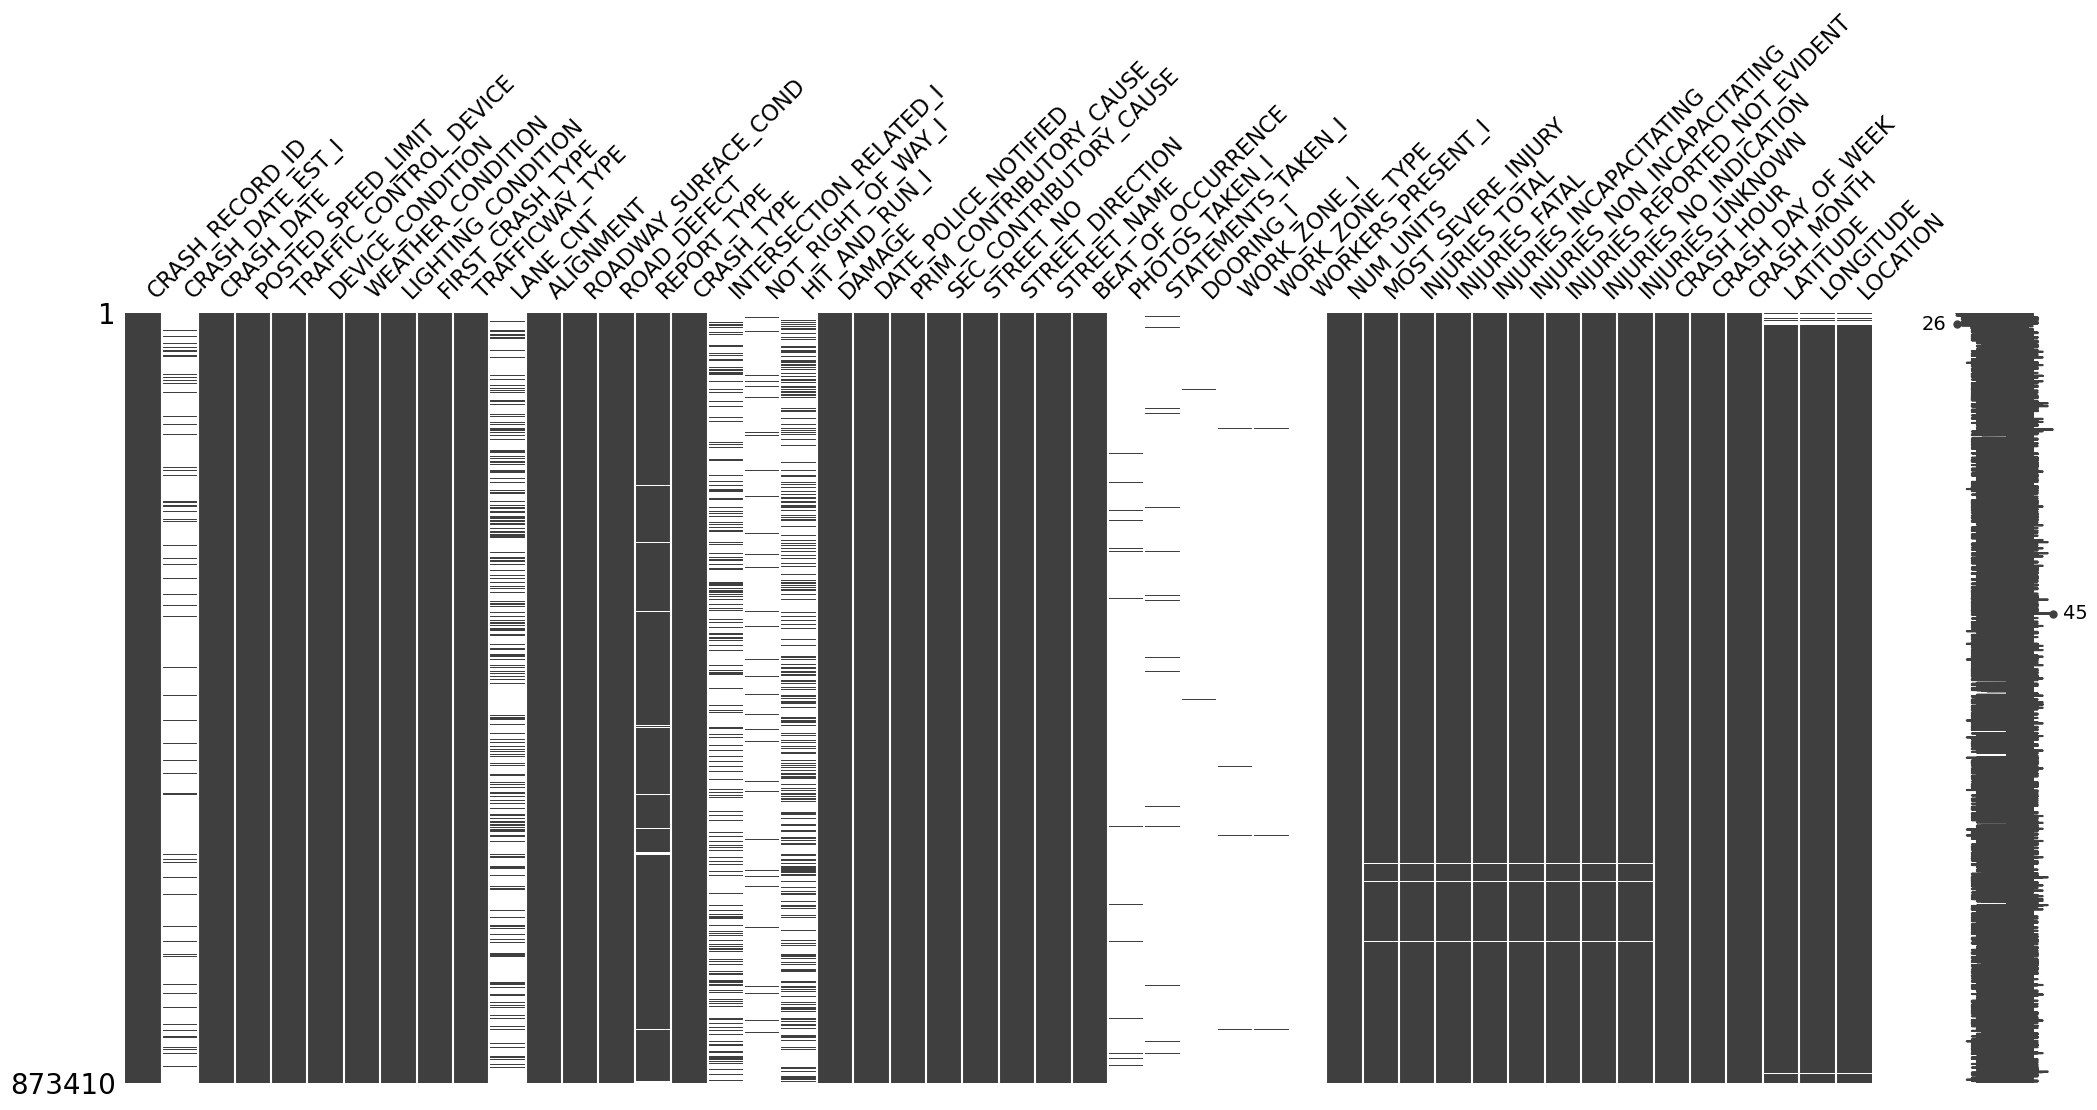

In [5]:
import missingno as msno

msno.matrix(Crashes)

In [6]:
Crashes.isna().sum()

CRASH_RECORD_ID                       0
CRASH_DATE_EST_I                 808592
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         674395
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       26727
CRASH_TYPE                            0
INTERSECTION_RELATED_I           673086
NOT_RIGHT_OF_WAY_I               833461
HIT_AND_RUN_I                    599600
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0
STREET_DIRECTION                      4


In [7]:
Crashes.dtypes

CRASH_RECORD_ID                   object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO                          int64
STREET_DIRECTION

In [8]:
Crashes = Crashes.drop(
    columns = [
        'PHOTOS_TAKEN_I',
        'STATEMENTS_TAKEN_I',
        'DOORING_I',
        'WORK_ZONE_I',
        'WORK_ZONE_TYPE',
        'WORKERS_PRESENT_I'])

In [9]:
Crashes['CRASH_DATE_EST_I'] = Crashes['CRASH_DATE_EST_I'].fillna('UNKNOWN')
Crashes['CRASH_DATE_EST_I'].astype('category')

0         UNKNOWN
1         UNKNOWN
2         UNKNOWN
3         UNKNOWN
4         UNKNOWN
           ...   
873405    UNKNOWN
873406    UNKNOWN
873407    UNKNOWN
873408          Y
873409    UNKNOWN
Name: CRASH_DATE_EST_I, Length: 873410, dtype: category
Categories (3, object): ['N', 'UNKNOWN', 'Y']

In [10]:
Crashes['CRASH_DATE'] = pd.to_datetime(Crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [11]:
Crashes['TRAFFIC_CONTROL_DEVICE'] = Crashes['TRAFFIC_CONTROL_DEVICE'].astype('category')

Crashes['DEVICE_CONDITION'] = Crashes['DEVICE_CONDITION'].astype('category')

Crashes['WEATHER_CONDITION'] = Crashes['WEATHER_CONDITION'].astype('category')

Crashes['LIGHTING_CONDITION'] = Crashes['LIGHTING_CONDITION'].astype('category')

Crashes['FIRST_CRASH_TYPE'] = Crashes['FIRST_CRASH_TYPE'].astype('category')

Crashes['TRAFFICWAY_TYPE'] = Crashes['TRAFFICWAY_TYPE'].astype('category')

Crashes['ALIGNMENT'] = Crashes['ALIGNMENT'].astype('category')

Crashes['ROADWAY_SURFACE_COND'] = Crashes['ROADWAY_SURFACE_COND'].astype('category')

Crashes['ROAD_DEFECT'] = Crashes['ROAD_DEFECT'].astype('category')

Crashes['CRASH_TYPE'] = Crashes['CRASH_TYPE'].astype('category')

Crashes['DAMAGE'] = Crashes['DAMAGE'].astype('category')

Crashes['PRIM_CONTRIBUTORY_CAUSE'] = Crashes['PRIM_CONTRIBUTORY_CAUSE'].astype('category')

Crashes['SEC_CONTRIBUTORY_CAUSE'] = Crashes['SEC_CONTRIBUTORY_CAUSE'].astype('category')

In [12]:
Crashes['REPORT_TYPE'] = Crashes['REPORT_TYPE'].fillna('UNKNOWN')
Crashes['REPORT_TYPE'] = Crashes['REPORT_TYPE'].astype('category')

In [13]:
Crashes['INTERSECTION_RELATED_I'] = Crashes['INTERSECTION_RELATED_I'].fillna('UNKNOWN')
Crashes['INTERSECTION_RELATED_I'] = Crashes['INTERSECTION_RELATED_I'].astype('category')

In [14]:
Crashes['NOT_RIGHT_OF_WAY_I'] = Crashes['NOT_RIGHT_OF_WAY_I'].fillna('UNKNOWN')
Crashes['NOT_RIGHT_OF_WAY_I'] = Crashes['NOT_RIGHT_OF_WAY_I'].astype('category')

In [15]:
Crashes['HIT_AND_RUN_I'] = Crashes['HIT_AND_RUN_I'].fillna('UNKNOWN')
Crashes['HIT_AND_RUN_I'] = Crashes['HIT_AND_RUN_I'].astype('category')

In [16]:
Crashes['DATE_POLICE_NOTIFIED'] = pd.to_datetime(Crashes['DATE_POLICE_NOTIFIED'], format='%m/%d/%Y %I:%M:%S %p')

In [17]:
Crashes['STREET_DIRECTION'] = Crashes['STREET_DIRECTION'].fillna('UNKNOWN')
Crashes['STREET_DIRECTION'] = Crashes['STREET_DIRECTION'].astype('category')

In [18]:
Crashes['STREET_NAME'] = Crashes['STREET_NAME'].fillna('UNKNOWN')
Crashes['STREET_NAME'] = Crashes['STREET_NAME'].astype('category')

In [19]:
Crashes['BEAT_OF_OCCURRENCE'] = Crashes['BEAT_OF_OCCURRENCE'].fillna(0)
Crashes['BEAT_OF_OCCURRENCE'] = Crashes['BEAT_OF_OCCURRENCE'].astype('int')

In [20]:
Crashes['MOST_SEVERE_INJURY'] = Crashes['MOST_SEVERE_INJURY'].fillna('UNKNOWN')
Crashes['MOST_SEVERE_INJURY'] = Crashes['MOST_SEVERE_INJURY'].astype('category')

In [21]:
Crashes = Crashes.dropna(subset=['INJURIES_INCAPACITATING'])
Crashes['INJURIES_INCAPACITATING'] = Crashes['INJURIES_INCAPACITATING'].astype('int')

In [22]:
Crashes = Crashes.dropna(subset=['INJURIES_REPORTED_NOT_EVIDENT'])
Crashes['INJURIES_REPORTED_NOT_EVIDENT'] = Crashes['INJURIES_REPORTED_NOT_EVIDENT'].astype('int')

In [23]:
Crashes = Crashes.dropna(subset=['INJURIES_NO_INDICATION'])
Crashes['INJURIES_NO_INDICATION'] = Crashes['INJURIES_NO_INDICATION'].astype('int')

In [24]:
Crashes = Crashes.dropna(subset=['INJURIES_UNKNOWN'])
Crashes['INJURIES_UNKNOWN'] = Crashes['INJURIES_UNKNOWN'].astype('int')

In [25]:
Crashes = Crashes.dropna(subset=['LATITUDE', 'LONGITUDE', 'LOCATION'])

In [26]:
Crashes['LANE_CNT'].isna().sum()

667545

In [27]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
new_column = imputer.fit_transform(Crashes[['LANE_CNT']])
Crashes['LANE_CNT'] = new_column

In [28]:
Crashes = Crashes[Crashes['LANE_CNT'] <= 16.0]

In [29]:
Crashes['LANE_CNT'] = Crashes['LANE_CNT'].astype('int')

In [30]:
Crashes['LANE_CNT'].value_counts()

LANE_CNT
2     758267
4      49341
1      32319
3       8510
0       7979
6       4443
5       1923
8       1898
7        182
10       156
9         65
12        26
11        24
15         6
16         5
14         3
Name: count, dtype: int64

## Cleaning People dataset


In [ ]:
# First few rows
print(People.head())

In [ ]:
msno.matrix(People)

In [ ]:
# Check for missing values
print(People.isnull().sum())

In [ ]:
# Display data types
print(People.dtypes)

In [ ]:
# Statistics on data
print(People.describe(include='all'))

### Drop columns not needed

In [ ]:
# Drop irrelevant columns
People.drop(columns=[
    'EMS_AGENCY',
    'EMS_RUN_NO',
    'HOSPITAL',
    'PEDPEDAL_ACTION',
    'PEDPEDAL_VISIBILITY',
    'PEDPEDAL_LOCATION',
    'SAFETY_EQUIPMENT'
    ], inplace=True)

In [ ]:
# Drop irrelevant columns
People.drop(columns=['DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS'], inplace=True)

### Handle missing values

In [ ]:
# Important that we have all the values for INJURY_CLASSIFICATION
# Drop rows with missing values
People.dropna(subset=['INJURY_CLASSIFICATION'], inplace=True)

# Convert INJURY_CLASSIFICATION to categorical
People['INJURY_CLASSIFICATION'] = People['INJURY_CLASSIFICATION'].astype('category')

In [ ]:
# Fill missing values with Unknown

People['AIRBAG_DEPLOYED'].fillna('NOT APPLICABLE', inplace=True)
People['VEHICLE_ID'].fillna('Unknown', inplace=True)
People['CITY'].fillna('Unknown', inplace=True)
People['STATE'].fillna('Unknown', inplace=True)

In [ ]:
# Fill unknown zipcodes with 00000
People['ZIPCODE'].fillna('00000', inplace=True)

# Handle missing values with 0
People['SEAT_NO'].fillna(0, inplace=True)

### Convert Data

In [ ]:
# Convert 'CRASH_DATE' to datetime
People['CRASH_DATE'] = pd.to_datetime(People['CRASH_DATE'], errors = 'coerce')

# Extract year, month, and day
People['CRASH_YEAR'] = People['CRASH_DATE'].dt.year
People['CRASH_MONTH'] = People['CRASH_DATE'].dt.month
People['CRASH_DAY'] = People['CRASH_DATE'].dt.day

In [ ]:
# Simplify 'BAC_RESULTS'
People['BAC_RESULT'] = People['BAC_RESULT'].replace({
    'TEST NOT OFFERED': 'NOT_TESTED',
    'TEST REFUSED': 'NOT_TESTED',
    'TEST PERFORMED, RESULTS UNKNOWN': 'UNKNOWN',
    'TEST TAKEN': 'TESTED'
})

People['BAC_RESULT'].fillna('UNKNOWN', inplace=True)

People['BAC_RESULT_ENCODED'] = People['BAC_RESULT'].map({
    'TESTED': 1,
    'NOT_TESTED': 0,
    'UNKNOWN': -1
})

# Check for inconsistencies
inconsistent_rows = People[(People['BAC_RESULT'] == 'TESTED') & (People['BAC_RESULT VALUE'] == 0)]
print(inconsistent_rows)

People.drop(columns=['BAC_RESULT'], inplace=True)

In [ ]:
# Changing missing values to 0
People['BAC_RESULT VALUE'].fillna(0, inplace = True)
People['BAC_RESULT VALUE'].value_counts()

In [ ]:
# Handle missing values and changing to categorical
People['EJECTION'].fillna('Unknown', inplace=True)
People['EJECTION'] = People['EJECTION'].astype('category')

People['DRIVER_VISION'].fillna('Unknown', inplace=True)
People['DRIVER_VISION'] = People['DRIVER_VISION'].astype('category')

People['PHYSICAL_CONDITION'].fillna('Unknown', inplace=True)
People['PHYSICAL_CONDITION'] = People['PHYSICAL_CONDITION'].astype('category')

People['DRIVER_ACTION'].fillna('Unknown', inplace=True)
People['DRIVER_ACTION'] = People['DRIVER_ACTION'].astype('category')

People['CELL_PHONE_USE'].fillna('Unknown', inplace=True)
People['CELL_PHONE_USE'] = People['CELL_PHONE_USE'].astype('category')

People['PERSON_TYPE'] = People['PERSON_TYPE'].astype('category')

People['SEX'].fillna('Unknown', inplace=True)
People['SEX'] = People['SEX'].astype('category')

### Remove Duplicates

In [ ]:
# Remove duplicates
People.drop_duplicates(subset=['CRASH_RECORD_ID', 'PERSON_ID'], inplace=True)

### Outliers

In [ ]:
# Handle Outliers in Age
People = People[(People['AGE'] >= 0) & (People['AGE'] <= 120)]
People['AGE'].value_counts()

In [ ]:
print(People.isnull().sum())

## Cleaning Vehicles Dataset

In [ ]:
## Quick Snapshot of what the Vehicles Dataset look like and identify what we don't need

Vehicles.head()

In [ ]:
## Check missing values

msno.matrix(Vehicles)

In [ ]:
# Get rid of values that we didn't need or had a lot of missing data
# missing values (80%)
missing_values = 0.8

# Calculate less than 80% missing
new = int((1 - missing_values) * len(Vehicles))

# Drop columns where the number of non-null values is less than 80%
Vehicles.dropna(axis=1, thresh=new, inplace=True)

In [ ]:
## Check what the remaining columns are and identify irrelevant columns

Vehicles.head(5)

In [ ]:
# Remove irrelevant columns that don't provide values to what we are looking for
Vehicles.drop(columns=['VEHICLE_ID','AREA_01_I'], inplace=True)

In [ ]:
## Check how many null values there are left

Vehicles.isna().sum()

In [ ]:
## Check if the columns are correct

Vehicles.head(5)

In [ ]:
## remove duplicates in the vehicles dataset

Vehicles = Vehicles.drop_duplicates()


In [ ]:
Vehicles.dtypes

In [ ]:
print(Vehicles.isnull().sum())

In [ ]:
## If there is no values on these columns
## means that the crash didn't involve cars.
## so dropping all of these columns because we only look at vehicle crashes

Vehicles = Vehicles.dropna(subset=['UNIT_TYPE', 'MAKE', 'MODEL','LIC_PLATE_STATE','VEHICLE_YEAR','VEHICLE_DEFECT','VEHICLE_TYPE','VEHICLE_USE','TRAVEL_DIRECTION','MANEUVER','OCCUPANT_CNT','FIRST_CONTACT_POINT'])

## Unit Type blank values doesn't add any values to the dataset as they have no other information on other columns so dropping these rows


In [ ]:
## double check if there are any missing values now

print(Vehicles.isnull().sum())

In [ ]:
data = Crashes.merge(People, on='CRASH_RECORD_ID', how='inner').merge(Vehicles, on='CRASH_RECORD_ID', how='inner')

In [ ]:
print(len(Crashes))
print(len(People))
print(len(Vehicles))

In [ ]:
for column, dtype in data.dtypes.items():
    print(column, dtype)

In [ ]:
data['INJURY_CLASSIFICATION'].value_counts() # target variable

In [ ]:
glob = data[(data['CRASH_DAY_OF_WEEK'] == 6) | (data['CRASH_DAY_OF_WEEK'] == 7)]

In [ ]:
glob['CRASH_DAY_OF_WEEK'].value_counts()

In [ ]:
sample = data.sample(frac=0.01)

In [ ]:
len(sample)

In [ ]:
sample['SEAT_NO'] = sample['SEAT_NO'].astype('category')
sample['CITY'] = sample['CITY'].astype('category')
sample['AIRBAG_DEPLOYED'] = sample['AIRBAG_DEPLOYED'].astype('category')
sample['STATE'] = sample['STATE'].astype('category')
sample['ZIPCODE'] = sample['ZIPCODE'].astype('category')
sample['UNIT_TYPE'] = sample['UNIT_TYPE'].astype('category')
sample['MAKE'] = sample['MAKE'].astype('category')
sample['MODEL'] = sample['MODEL'].astype('category')
sample['VEHICLE_DEFECT'] = sample['VEHICLE_DEFECT'].astype('category')
sample['VEHICLE_TYPE'] = sample['VEHICLE_TYPE'].astype('category')
sample['VEHICLE_USE'] = sample['VEHICLE_USE'].astype('category')
sample['EJECTION'] = sample['EJECTION'].astype('category')

In [ ]:
sample['INJURY_CLASSIFICATION'].value_counts()

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['INJURY_CLASSIFICATION'], edgecolor='black')
plt.title(f'Injury Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
sample['CRASH_DAY_OF_WEEK'].value_counts()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN

X = sample[
    [
        'POSTED_SPEED_LIMIT',
        'WEATHER_CONDITION',
        'LIGHTING_CONDITION',
        'FIRST_CRASH_TYPE',
        'TRAFFICWAY_TYPE',
        'LANE_CNT',
        'ROADWAY_SURFACE_COND',
        'ROAD_DEFECT',
        'INTERSECTION_RELATED_I',
        'NOT_RIGHT_OF_WAY_I',
        'PRIM_CONTRIBUTORY_CAUSE',
        'CRASH_HOUR',
        'CRASH_DAY_OF_WEEK',
        'LATITUDE',
        'LONGITUDE',
        'PERSON_TYPE',
        'SEAT_NO',
        'SEX',
        'AGE',
        'AIRBAG_DEPLOYED',
        'DRIVER_ACTION',
        'DRIVER_VISION',
        'CITY',
        'STATE',
        'ZIPCODE',
        'CELL_PHONE_USE',
        'UNIT_TYPE',
        'MAKE',
        'MODEL',
        'VEHICLE_YEAR',
        'VEHICLE_DEFECT',
        'VEHICLE_TYPE',
        'VEHICLE_USE',
        'EJECTION'
        
    ]
]
y = sample['INJURY_CLASSIFICATION']

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,test_size=0.20, shuffle=True)

In [ ]:
from pprint import pprint

features = [
    'POSTED_SPEED_LIMIT',
    'WEATHER_CONDITION',
    'LIGHTING_CONDITION',
    'FIRST_CRASH_TYPE',
    'TRAFFICWAY_TYPE',
    'LANE_CNT',
    'ROADWAY_SURFACE_COND',
    'ROAD_DEFECT',
    'INTERSECTION_RELATED_I',
    'NOT_RIGHT_OF_WAY_I',
    'PRIM_CONTRIBUTORY_CAUSE',
    'CRASH_HOUR',
    'CRASH_DAY_OF_WEEK',
    'LATITUDE',
    'LONGITUDE',
    'PERSON_TYPE',
    'SEAT_NO',
    'SEX',
    'AGE',
    'AIRBAG_DEPLOYED',
    'DRIVER_ACTION',
    'DRIVER_VISION',
    'CITY',
    'STATE',
    'ZIPCODE',
    'CELL_PHONE_USE',
    'UNIT_TYPE',
    'MAKE',
    'MODEL',
    'VEHICLE_YEAR',
    'VEHICLE_DEFECT',
    'VEHICLE_TYPE',
    'VEHICLE_USE',
    'EJECTION'
]

pprint(features, width=70, compact=False)

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTEN
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10,test_size=0.20, shuffle=True)

print(Counter(y_train))
ros = RandomOverSampler(sampling_strategy='not majority')
smote = SMOTE(sampling_strategy='not majority')
smoten = SMOTEN()

X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

print(Counter(y_train_resampled))

In [ ]:
from sklearn.metrics import classification_report

preprocessor = ColumnTransformer(
    transformers=[
        ('speed', 'passthrough', ['POSTED_SPEED_LIMIT']),
        ('weather', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['WEATHER_CONDITION']),
        ('light', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['LIGHTING_CONDITION']),
        ('first_crash_type', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['FIRST_CRASH_TYPE']),
        ('trafficway_type', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['TRAFFICWAY_TYPE']),
        ('lane_count', 'passthrough', ['LANE_CNT']),
        ('surface_condition', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['ROADWAY_SURFACE_COND']),
        ('road_defect', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['ROAD_DEFECT']),
        ('intersection_related', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['INTERSECTION_RELATED_I']),
        ('outside_right_of_way', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['NOT_RIGHT_OF_WAY_I']),
        ('primary_cause', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['PRIM_CONTRIBUTORY_CAUSE']),
        ('crash_hour', 'passthrough', ['CRASH_HOUR']),
        ('day', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['CRASH_DAY_OF_WEEK']),
        ('latitude', 'passthrough', ['LATITUDE']),
        ('longitude', 'passthrough', ['LONGITUDE']),
        ('person_type', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['PERSON_TYPE']),
        ('seat_number', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['SEAT_NO']),
        ('sex', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['SEX']),
        ('age', 'passthrough', ['AGE']),
        ('city', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['CITY']),
        ('zipcode', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['ZIPCODE']),
        ('state', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['STATE']),
        ('airbag_deployed', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['AIRBAG_DEPLOYED']),
        ('driver_action', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['DRIVER_ACTION']),
        ('driver_vision', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['DRIVER_VISION']),
        ('cell_phone_use', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['CELL_PHONE_USE']),
        ('unit_type', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['UNIT_TYPE']),
        ('make', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['MAKE']),
        ('model', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['MODEL']),
        ('vehicle_year', 'passthrough', ['VEHICLE_YEAR']),
        ('vehicle_defect', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['VEHICLE_DEFECT']),
        ('vehicle_type', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['VEHICLE_TYPE']),
        ('vehicle_use', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['VEHICLE_USE']),
        ('ejection', OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore'), ['EJECTION']),
    ])


rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        criterion='entropy',
        n_estimators=100, 
        max_depth=10,
        min_samples_leaf=4,
        min_samples_split=2,
        max_features='log2',
        ccp_alpha=0.01,
        max_leaf_nodes=10,
        random_state=10))
])

rf_pipeline.fit(X_train_resampled, y_train_resampled)


score = rf_pipeline.score(X_test, y_test)
print(f"Model accuracy: {score}")

y_pred = rf_pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

In [ ]:
feature_names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

importances = rf_pipeline.named_steps['classifier'].feature_importances_

indices = np.argsort(importances)[::-1]

for i in range(len(feature_names)):
    print("%d. %s (%f)" % (i + 1, feature_names[indices[i]], importances[indices[i]]))

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})
feature_importance = feature_importance.sort_values('importance', ascending=False).reset_index(drop=True)

print(feature_importance.head(10))